Prerequisites: Load Libraries 

In [ ]:
#Ensure all packages are downloaded
%pip install pandas
%pip install numpy
%pip install statsmodels
%pip install matplotlib
%pip install scikit-learn

In [1]:
#Import packages
import pandas as pd
import numpy as np

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Question 1: Load csv file into Panadas dataframe

In [2]:
google_data = pd.read_csv('Google.csv')

#Check to ensure that file loaded
google_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


Question 2: Divide the dataset into training and test

In [10]:
#Test set: Last 5 days of data
test_data = google_data[['Date', 'Close']][-5:]
test_data.head()

#Training set: rest of data
train_data = google_data[['Date', 'Close']][:-5]
train_data.head()

,Date,Close
0,2020-04-27,1270.859985
1,2020-04-28,1232.589966
2,2020-04-29,1342.180054
3,2020-04-30,1346.699951
4,2020-05-01,1317.319946


Question 3a: Forecast the last 5 days of the closing price using Naive Forecast

In [ ]:
last_observed_value = train_data['Close'].iloc[-1]
test_data.loc[:,'predicted_last'] = last_observed_value

Question 3b: Forecast the last 5 days of the closing price using Historical Mean Forecast

In [12]:
mean = np.mean(train_data['Close'])
test_data.loc[:,'predicted_mean'] = mean

In [18]:
test_data

,Date,Close,predicted_last,predicted_mean
248,2021-04-21,2278.350098,2279.01001,1689.993184
249,2021-04-22,2252.520020,2279.01001,1689.993184
250,2021-04-23,2299.929932,2279.01001,1689.993184
251,2021-04-26,2309.929932,2279.01001,1689.993184
252,2021-04-27,2290.979980,2279.01001,1689.993184


Question 4: Using Mean Squared Error, evaluate both methods

In [14]:
#Evaluate Mean Squared Error for Naive forecast
mse_naive = mean_squared_error(test_data['Close'], test_data['predicted_last'])
print("MSE for Naive Forecast:", mse_naive)

MSE for Naive Forecast: 447.82398976418415


In [15]:
#Mean Squared Error for Historical Mean Forecast
mse_historical = mean_squared_error(test_data['Close'], test_data['predicted_mean'])
print("MSE for Historical Mean Forecast:", mse_historical)

MSE for Historical Mean Forecast: 356025.96701539395


Question 5: Which method is better

The better forecast is Naive Forecast because it has a lower MSE. Meaning that the predictions are much closer to the actual values of the Close prices.

Question 6a: Plot Naive Forecast

[]

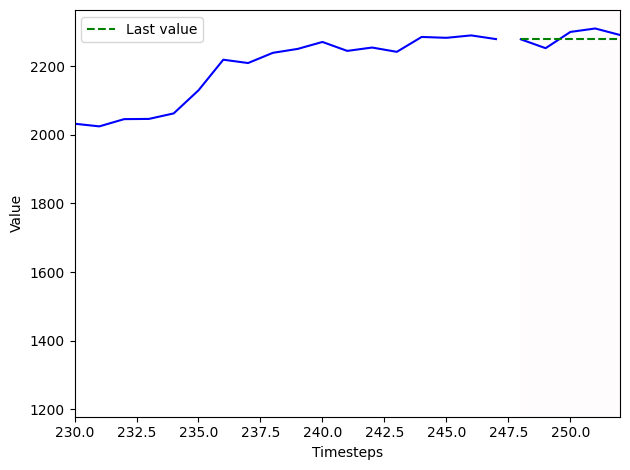

In [23]:
fig, ax = plt.subplots()
ax.plot(train_data['Close'],'b-')
ax.plot(test_data['Close'], 'b-')
ax.plot(test_data['predicted_last'], 'g--', label = 'Last value')

ax.axvspan(248, 252, color='#FFF0F5', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.xlim(230,252)
plt.tight_layout()
plt.plot()

Question 6b: Plot Historical Mean Forecast

[]

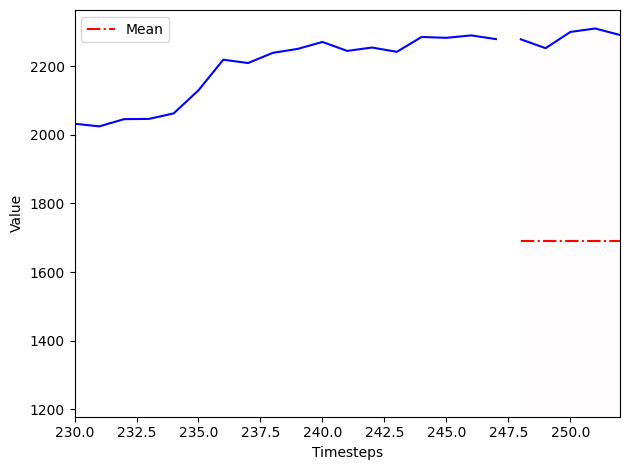

In [24]:
fig, ax = plt.subplots()
ax.plot(train_data['Close'],'b-')
ax.plot(test_data['Close'], 'b-')
ax.plot(test_data['predicted_mean'], 'r-.', label = 'Mean')

ax.axvspan(248, 252, color='#FFF0F5', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.xlim(230,252)
plt.tight_layout()
plt.plot()